In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
plt.style.use('fivethirtyeight')

In [187]:
df = pd.read_csv('dados_limpos.csv', encoding="latin1", parse_dates=['DATA']);

In [188]:
df.describe()

,ANO,MES,DIA,VALOR_REEMBOLSADO,MAIOR_QUE_100
count,26691.0,26691.000000,26691.000000,26691.000000,26691.000000
mean,2016.0,6.470908,15.431419,947.484513,0.784085
std,0.0,3.257134,8.847378,2733.820037,0.411464
min,2016.0,1.000000,1.000000,0.010000,0.000000
25%,2016.0,4.000000,8.000000,124.000000,1.000000
50%,2016.0,6.000000,15.000000,324.790000,1.000000
75%,2016.0,9.000000,23.000000,956.865000,1.000000
max,2016.0,12.000000,31.000000,256980.000000,1.000000


In [189]:
df.loc[df['VALOR_REEMBOLSADO'] > 250000]

,ANO,MES,DIA,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,MAIOR_QUE_100
4637,2016,12,22,DAVI ALCOLUMBRE,Divulgação,04.953.008/0001-23,ARTE & IMAGEM GRAFICA E EDITORA EIRELI ME,202,2017-03-22,NaN,256980.0,1


In [190]:
df.loc[(df['TIPO_DESPESA'] == 'Publicidade') & (df['VALOR_REEMBOLSADO'] > 30000)]

,ANO,MES,DIA,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,MAIOR_QUE_100


In [191]:
gastos_senadores = df.groupby('SENADOR')

In [192]:
gastos_senadores = gastos_senadores['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False)

In [193]:
top_10_senadores = gastos_senadores.head(10)

In [194]:
top_10_senadores

SENADOR
DAVI ALCOLUMBRE       510076.07
JOÃO CAPIBERIBE       502997.57
TELMÁRIO MOTA         488678.92
PAULO ROCHA           485114.40
VANESSA GRAZZIOTIN    477079.76
RANDOLFE RODRIGUES    471847.84
SÉRGIO PETECÃO        463456.45
GLADSON CAMELI        459977.83
ROMERO JUCÁ           446448.98
CIRO NOGUEIRA         440047.81
Name: VALOR_REEMBOLSADO, dtype: float64

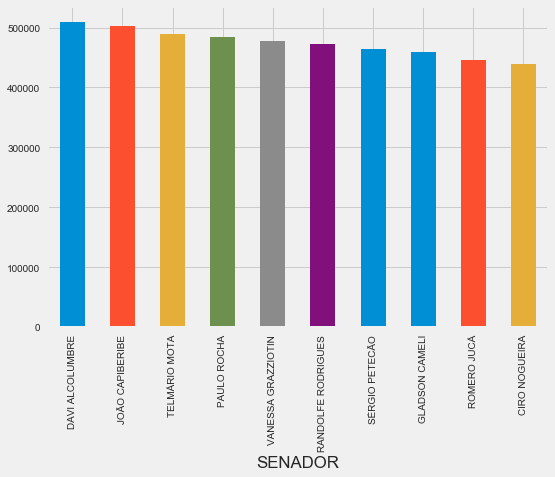

In [195]:
top_10_senadores.plot(kind="bar")
# plt.title('Top 10 senadores mais gastões')
# plt.ylabel('Valores gatos')

In [196]:
top_10_senadores.index

Index(['DAVI ALCOLUMBRE', 'JOÃO CAPIBERIBE', 'TELMÁRIO MOTA', 'PAULO ROCHA',
       'VANESSA GRAZZIOTIN', 'RANDOLFE RODRIGUES', 'SÉRGIO PETECÃO',
       'GLADSON CAMELI', 'ROMERO JUCÁ', 'CIRO NOGUEIRA'],
      dtype='object', name='SENADOR')

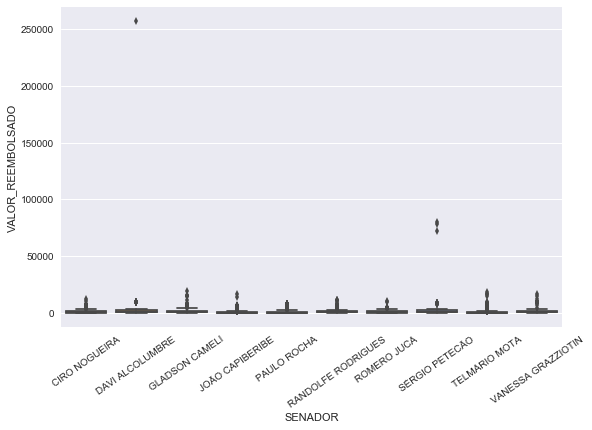

In [197]:
gastos_top_10 = df.loc[df['SENADOR'].isin(top_10_senadores.index) & df['VALOR_REEMBOLSADO']]

plt.style.use('seaborn')
sns.boxplot(x=gastos_top_10['SENADOR'], y=gastos_top_10['VALOR_REEMBOLSADO'])
plt.xticks(rotation=35)
plt.show()

In [198]:
mapa_de_calor = df

In [199]:
mapa_de_calor['DATA'] = df['DATA'].dt.strftime('%Y-%m')

In [200]:
mapa_de_calor.head()

,ANO,MES,DIA,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,MAIOR_QUE_100
0,2016,1,13,ACIR GURGACZ,Aluguel de imóvel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,2016-01,Despesa com pagamento de energia elétrica para...,73.60,0
1,2016,1,18,ACIR GURGACZ,Aluguel de imóvel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,2016-01,Pagamento de energia elétrica para o escritóri...,206.84,1
2,2016,1,1,ACIR GURGACZ,Aluguel de imóvel,004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,2016-04,"Despesa com pagamento de aluguel, utilizado pa...",6000.00,1
3,2016,1,16,ACIR GURGACZ,Aluguel de imóvel,05.423.963/0001-11,OI MÓVEL S.A.,661639001,2016-01,despesa com pagamento de telefonia para o escr...,407.48,1
4,2016,1,1,ACIR GURGACZ,Aquisição de material,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,2016-06,Aquisição de publicação virtual de conteúdo jo...,550.00,1


In [211]:
df_pivot = mapa_de_calor.pivot_table(
    index='DATA', 
    columns='TIPO_DESPESA', 
    values='VALOR_REEMBOLSADO',
    aggfunc=np.sum,
    fill_value=0)

In [220]:
df_pivot = df_pivot.loc['2016-01':'2016-12']

In [221]:
df_pivot

TIPO_DESPESA,Aluguel de imóvel,Aquisição de material,Consultorias,Divulgação,Logística,Passagens,Serviços
DATA,,,,,,,
2016-01,681720.72,130287.53,519205.27,419496.30,878387.57,423176.74,284426.09
2016-02,355621.91,103718.82,286143.29,252818.74,592270.58,487826.19,21832.40
2016-03,361367.60,94986.41,255112.80,291705.97,440847.14,586842.49,33859.82
2016-04,392789.93,93684.00,243225.69,224044.85,462978.26,549032.37,21978.24
2016-05,765999.20,80266.83,275629.88,263856.45,476910.51,520546.83,39480.96
2016-06,371057.80,90153.46,219292.74,320627.83,423650.18,624275.09,13873.95
2016-07,306088.26,67689.75,136238.66,200566.67,475541.95,453256.15,7124.31
2016-08,252439.17,78291.64,202764.55,256752.60,420363.64,578393.33,34069.32
2016-09,334052.65,78875.75,107722.85,200740.90,473085.66,469299.83,9194.48


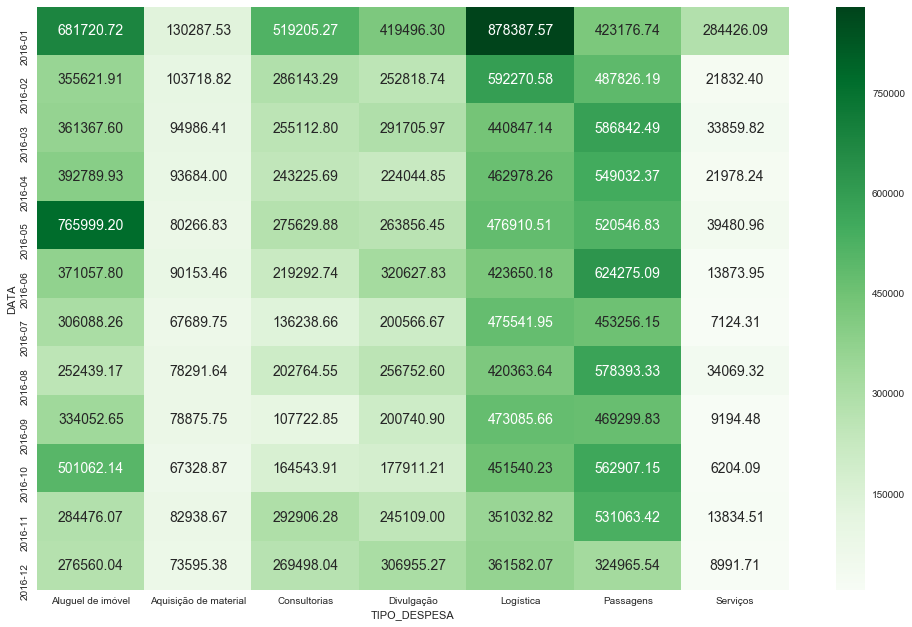

In [249]:
plt.figure(figsize=(15,10))
sns.heatmap(df_pivot, annot=True, fmt='.2f', cmap="Greens")
plt.show()